# Machine Learning & Statistics Project 2020

In this project you must create a web service that uses machine learning to make predictions
based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests.

### Objectives:

Explore the Power production dataset

Explore models

Determine model to use

Develop web service
***************************************************************

In [144]:
# Import libraries
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import sklearn.linear_model as lin
from sklearn.linear_model import LinearRegression
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import sklearn.preprocessing as skpp
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
import tensorflow.keras as kr

In [2]:
# Make matplotlib .....
%matplotlib inline

# Apply the default seaborn settings
sns.set()

#Set plot style
plt.style.use("ggplot")

# Set plot size
plt.rcParams['figure.figsize'] = [18, 10]

In [3]:
# Import the power production dataset and view the data
data = pd.read_csv("powerproduction.csv")

# View the whole dataset
pd.set_option("max_rows", None)
data

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [4]:
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### About Dataset

The dataset powerproduction will be used to produce a model that accurately predicts wind turbine power output from wind speed values. It contains 500 values for two variables speed and power, speed being wind speed and power being the wind turbine power output. Although the measurement units of the variables are not defined wind speed is most commonly measured in metres/second (m/s) and the power output measured in Kilowatts (kW). The wind speed ranges from 0 m/s to 25 m/s and the power output ranges between 0 kW to 113.556 kW.
*************************************************************

#### View Dataset

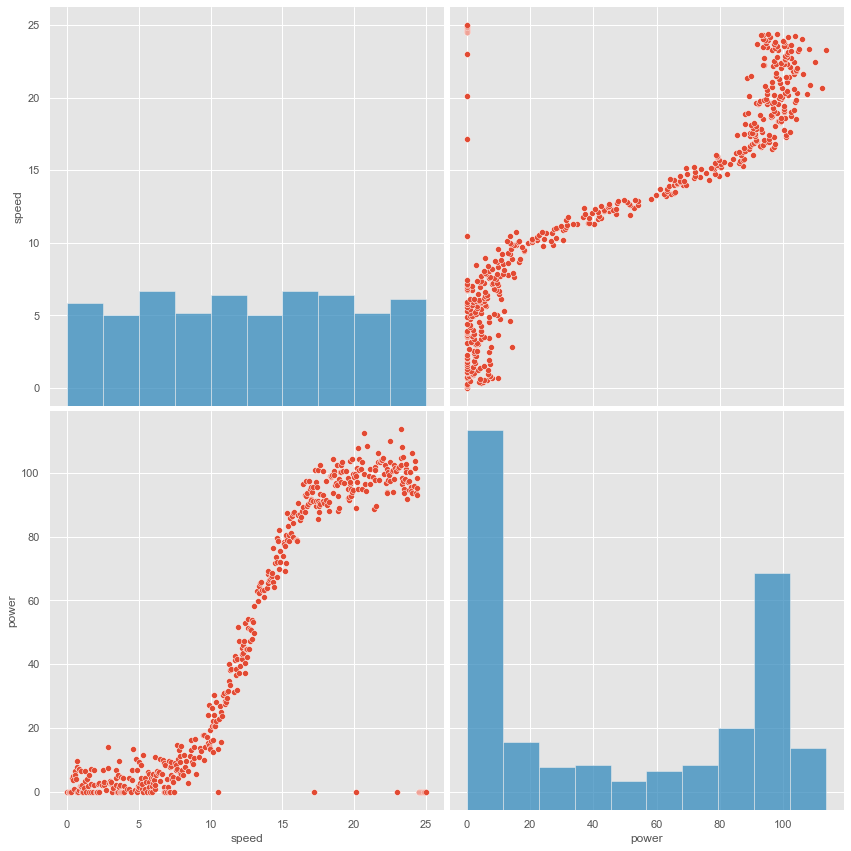

In [5]:
# Create a pairplot to view the dataset
sns.pairplot(data, height=6)

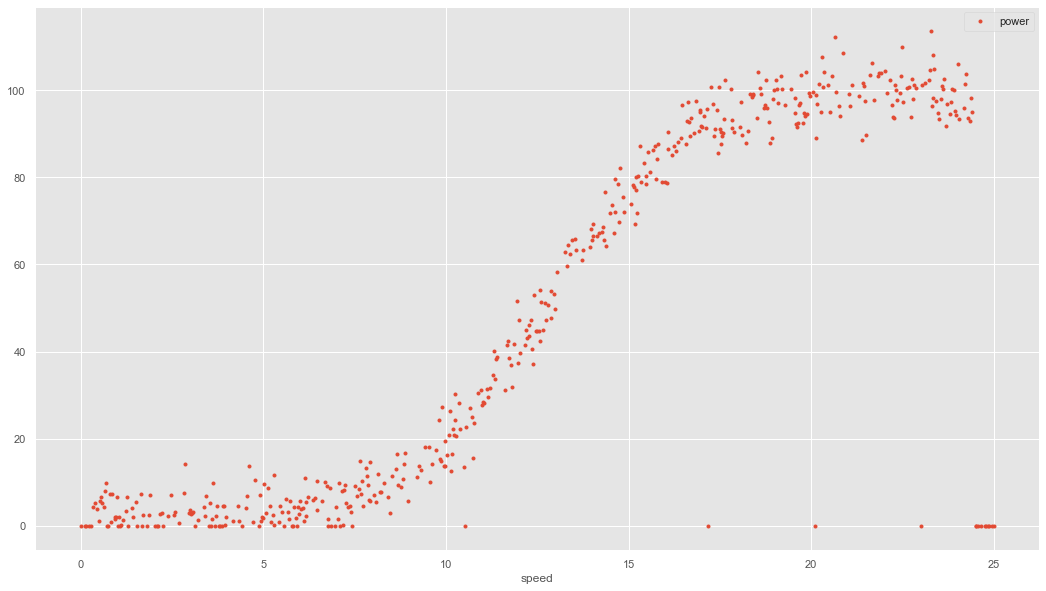

In [6]:
# Plot data
data.plot(x="speed", y="power", style=".")
plt.show()

#### Observations

* The wind turbines do not begin to operate until the wind speed reaches over 3 m/s. Wind turbines operate automatically and self-start when the wind speed reaches an average of about three to five m/s[1].


* The output increases linearly from approxiately 10 to 25 m/s. 25 m/s is the maximum operational limit[1].


* When the wind exceeds the maximum operational limit of 25m/s the wind turbine shuts down.


* The wind speed data value range appears to follow a uniform distribution


* The power output data has a greater distribution at the low and high power output range



Due to the operational constraints of the wind turbines there are a number of zero values within the dataset. Most of these are situated at the beginning, where wind speed is under 3 m/s, and at the end when it is near its limit of 25 m/s. There are some other random zero value data points throughout the dataset which could be related to the trubines being shut down for operational and maintenance purposes[1]. 

For modelling purposes these data points will be removed from the dataset as they do not appear to follow the natural relationship between speed and power, and it is best to include only data points relating to the turbines when they were in operation. 

#### Remove Zero Value Data Points

In [21]:
# Remove zero power values https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df = data[(data.power != 0)]

# View data details
df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


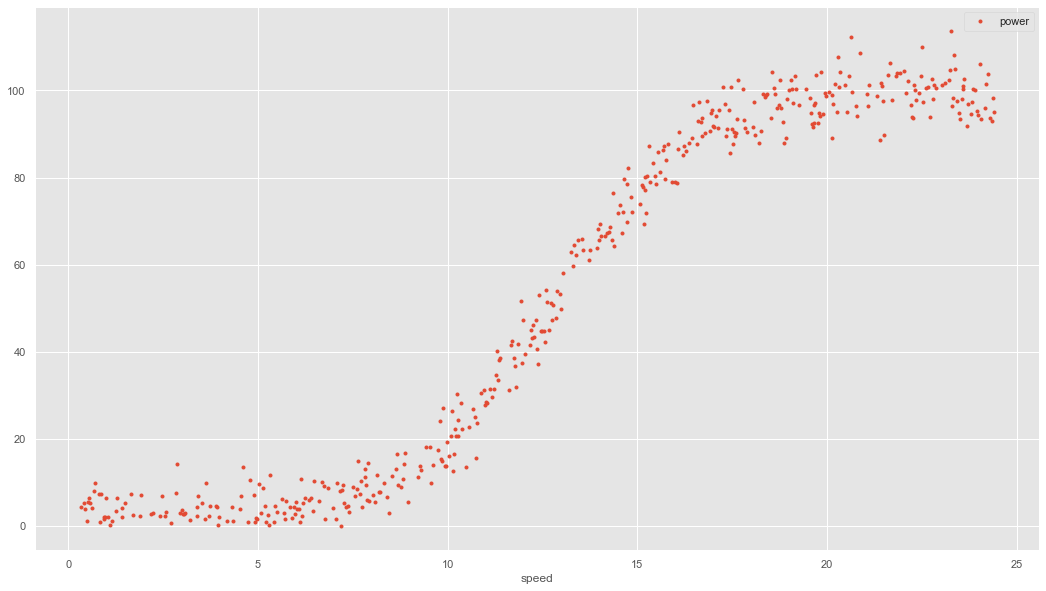

In [22]:
# Plot updated dataset
df.plot(x="speed", y="power", style=".")
plt.show()

After the zero power output data points are removed the dataset contains 451 data points. From the plot above it is clear to see that an S-shaped speed to power relationship curve exists, also known as a Sigmoid function curve[2].
***********************************************************

#### Explore Models

In [28]:
# Convert the data from a pandas dataframe to a numpy array for use in the models
# ref - https://stackoverflow.com/questions/51150153/valueerror-expected-2d-array-got-1d-array-instead/64042705#64042705
#x = df.iloc['speed'].values
#y = df.iloc['power'].values

#x = x.reshape(-1,1)


x = df['speed'].values.reshape(-1,1)
y = df['power'].values.reshape(-1,1)


#Spliting the dataset into Training set and Test Set
#from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0)

Text(0.5, 1.0, 'Test set')

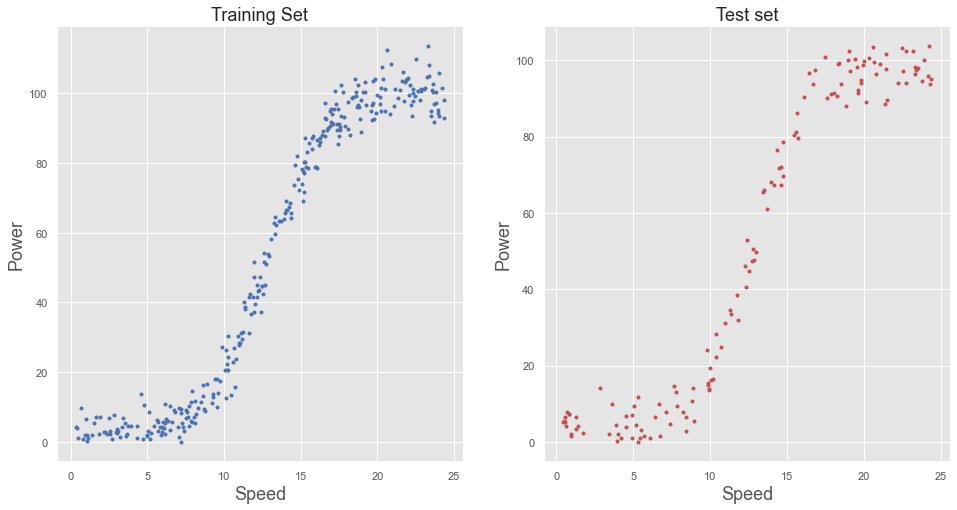

In [66]:
# View the training and testing data

# Set the parameters for the subplots to be created
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the data set before and after cleaning for comparison purposes
axes[0].plot(x_train, y_train, 'b.')
axes[1].plot(x_test, y_test, 'r.')

# Add labels 
axes[0].set_xlabel('Speed', fontsize=18)
axes[0].set_ylabel('Power', fontsize=18)
axes[1].set_xlabel('Speed', fontsize=18)
axes[1].set_ylabel('Power', fontsize=18)

# Add titles to subplots
axes[0].set_title('Training Set', fontsize=18)
axes[1].set_title('Test set', fontsize=18)

##### Linear Regression

ABOUT!!!!!!!

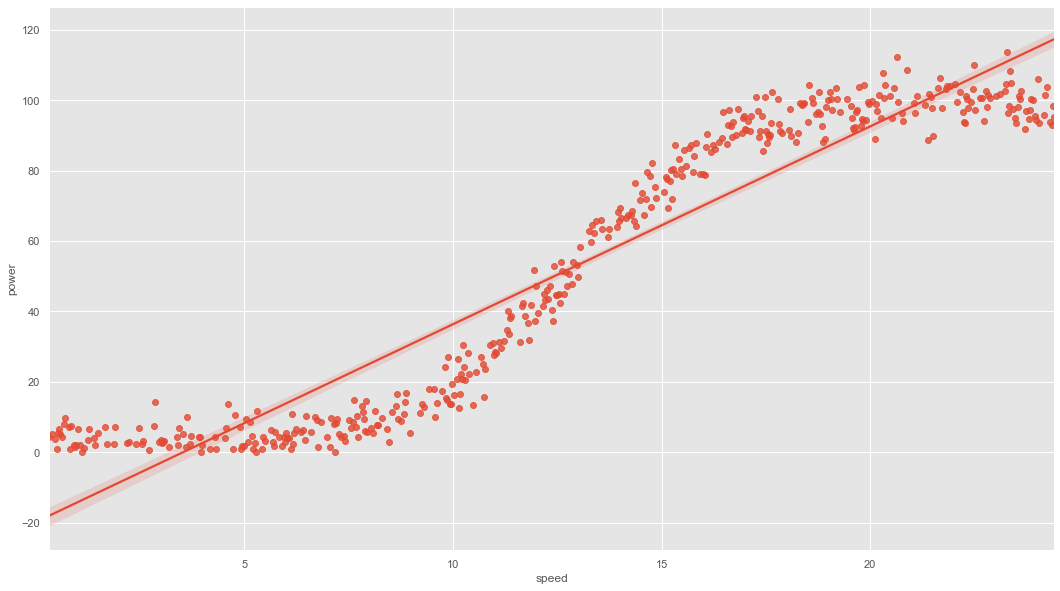

In [68]:
# Plotting the line of best fit
sns.regplot(x="speed", y="power", data=df)
plt.show()

In [29]:
# Creating the model 
lin_model = LinearRegression()

# Training the model with training data
lin_model.fit(x_train, y_train)

LinearRegression()

In [58]:
# Evaluate the model
r2 = lin_model.score(x,y)
r2

0.897753316179645

In [60]:
p = [lin_model.intercept_, lin_model.coef_[0]]
p

[array([-21.74094086]), array([5.77731013])]

In [64]:
# Test model using predict function
lin_pred = lin_model.predict(x_test)

In [63]:
# Compare predictions against acutal values, use flatten() to return a copy of the array collapsed into one dimension
# Code adapted from https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe

testdata = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lin_pred.flatten()})
testdata

,Actual,Predicted
0,9.385,23.657162
1,0.132,1.102543
2,80.418,67.605160
3,93.698,74.838353
4,65.605,55.894553
5,6.656,26.834683
6,7.350,-16.824450
7,94.071,92.765346
8,86.288,68.766400
9,0.929,9.629853


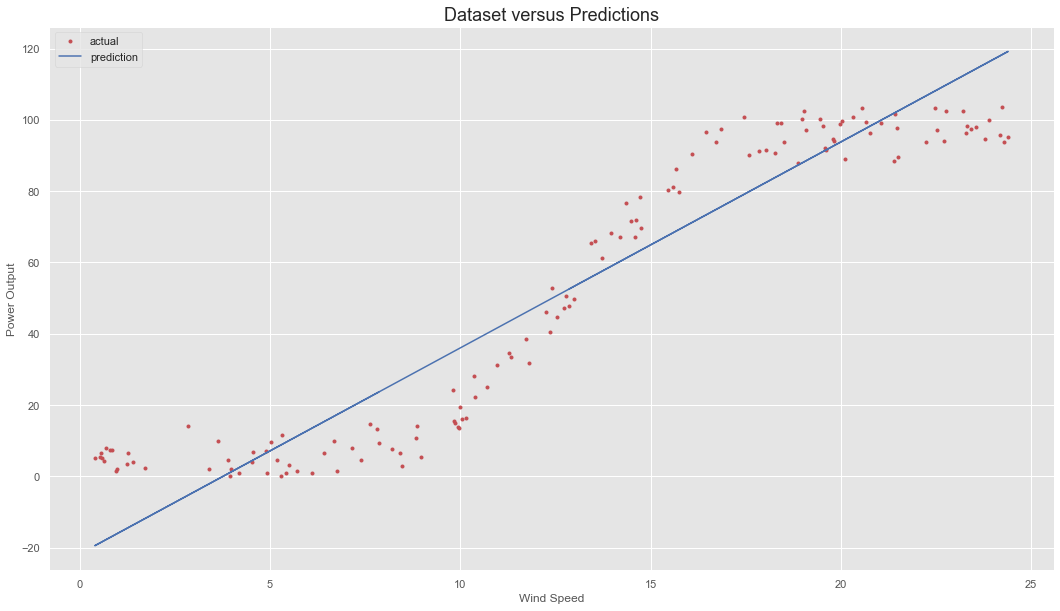

In [134]:
# Plot predictions against the data
plt.plot(x_test, y_test, 'r.', label='actual')
plt.plot(x_test, lin_pred, 'b-', label='prediction')
plt.title("Dataset versus Predictions", fontsize = 18)
plt.xlabel("Wind Speed")
plt.ylabel("Power Output")
plt.legend();

##### Conclusion





************************************************************************

##### Polynomial Regression

ABOUT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [98]:
#Fitting the polynomial regression model to the dataset
poly_reg=PolynomialFeatures(degree=4)

x_trainpoly=poly_reg.fit_transform(x_train)
polyreg=LinearRegression()
polyreg.fit(x_trainpoly, y_train)
x_test_poly = poly_reg.fit_transform(x_test)

In [75]:
p_r2 = polyreg.score(x_test_poly,y_test)
p_r2

0.9731887894212919

In [77]:
polyp =[[polyreg.intercept_, lin_model.coef_[0]]]
polyp

[[array([14.3340745]), array([5.77731013])]]

In [146]:
poly_pred = polyreg.predict(poly_reg.fit_transform(x_test))

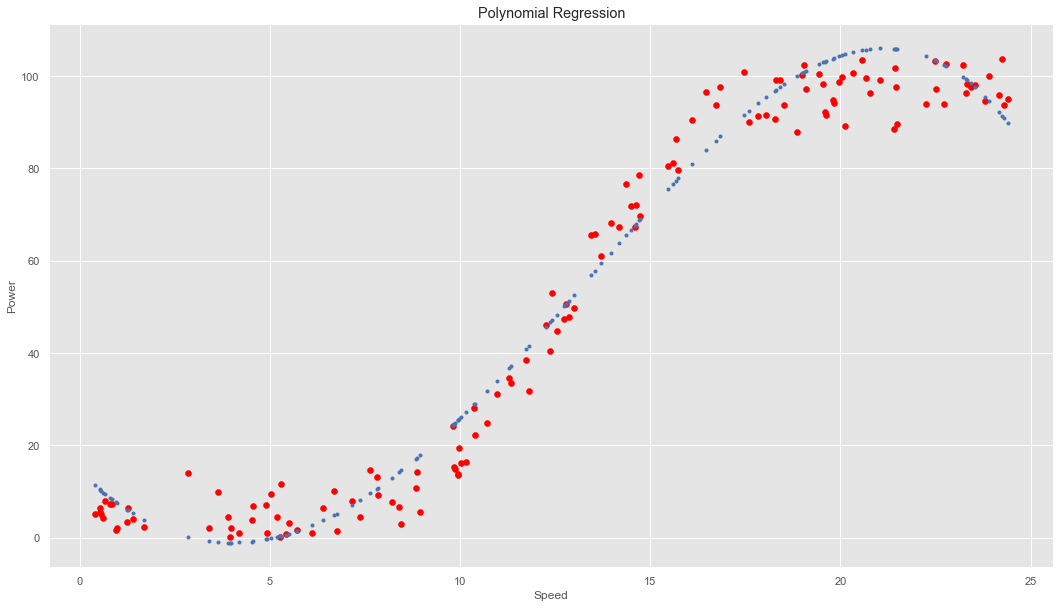

In [147]:
# Visualising the Polynomial Regression results
#x_grid = np.arange(min(x), max(x), 0.1)
#x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_test, y_test, color = 'red') 
  
plt.plot(x_test, poly_pred, 'b.')
plt.title('Polynomial Regression') 
plt.xlabel('Speed') 
plt.ylabel('Power') 
  
plt.show()

#### Compare

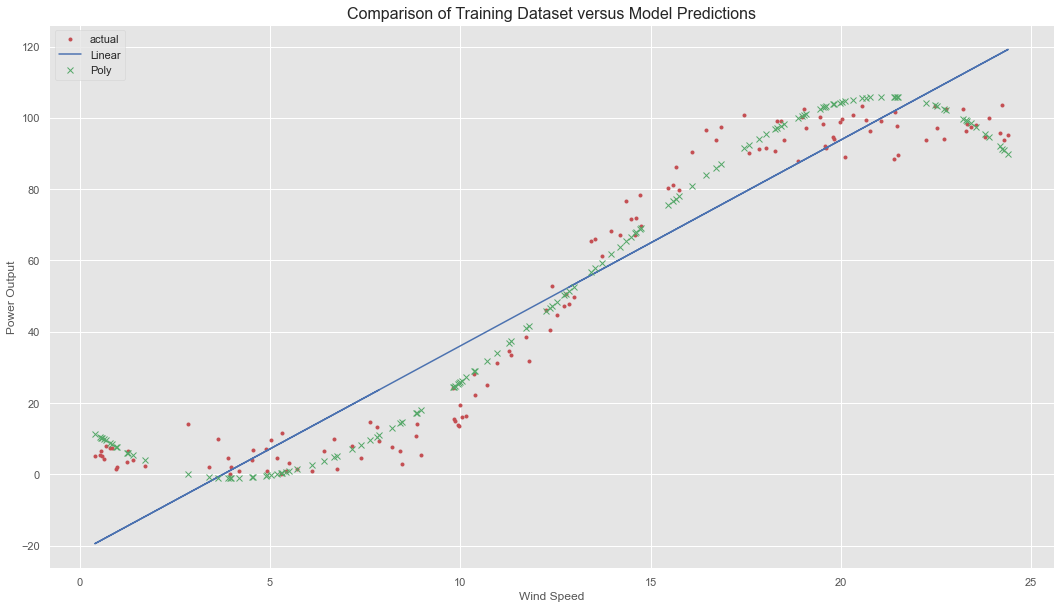

In [148]:
# Plot training dataset comparison
plt.plot(x_test, y_test, 'r.', label='actual')
plt.plot(x_test, lin_pred, 'b-', label='Linear')
plt.plot(x_test, poly_pred, 'gx', label='Poly')
plt.title("Comparison of Training Dataset versus Model Predictions", fontsize = 16)
plt.xlabel("Wind Speed")
plt.ylabel("Power Output")
plt.legend();

In [149]:
# Evaluating the performance of the model
# https://vijay-choubey.medium.com/how-to-evaluate-the-performance-of-a-machine-learning-model-d12ce920c365
print('Linear Model')
print('====================================')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lin_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred)) 
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred, squared=False))
print('R-squared:', metrics.r2_score(y_test, lin_pred))

print('\n\nPoly Model')
print('====================================')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred)) 
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred, squared=False))
print('R-squared:', metrics.r2_score(y_test, poly_pred))

Linear Model
Mean Absolute Error: 11.75568111431187
Mean Squared Error: 190.56823555495086
Root Mean Squared Error: 13.804645433873008
R-squared: 0.8834550362337497


Poly Model
Mean Absolute Error: 5.319027207579941
Mean Squared Error: 43.84029071667371
Root Mean Squared Error: 6.62120009640803
R-squared: 0.9731887894212919


##### KERAS

ABOUT!!!!!

In [162]:
# Adapted from https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb
# Create a new neural network.
model = kr.models.Sequential()

# Add multiple layers, initialised with weight and bias.
model.add(kr.layers.Dense(66, input_dim=1, activation="relu",kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(32, activation='sigmoid'))
model.add(kr.layers.Dense(16, activation='sigmoid'))
model.add(kr.layers.Dense(1, activation=None))


# Compile the model.
model.compile(loss="mean_squared_error", optimizer="adam")

# Model Summary
print ("Model Summary\n")
model.summary()

Model Summary

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 66)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2144      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 2,821
Trainable params: 2,821
Non-trainable params: 0
_________________________________________________________________


In [18]:
x = df.iloc[:,:-1].to_numpy()
y = df['power'].to_numpy()
x = x.reshape(-1, 1)

In [19]:
model.fit(x, y, epochs=500, batch_size=12)
model.summary()

Epoch 1/500
38/38 [==============================] - 0s 3ms/step - loss: 4323.6611
Epoch 2/500
38/38 [==============================] - 0s 2ms/step - loss: 4180.7510
Epoch 3/500
38/38 [==============================] - 0s 2ms/step - loss: 4098.6074
Epoch 4/500
38/38 [==============================] - 0s 2ms/step - loss: 4035.7629
Epoch 5/500
38/38 [==============================] - 0s 2ms/step - loss: 3984.2144
Epoch 6/500
38/38 [==============================] - 0s 3ms/step - loss: 3937.4233
Epoch 7/500
38/38 [==============================] - 0s 2ms/step - loss: 3893.8921
Epoch 8/500
38/38 [==============================] - 0s 2ms/step - loss: 3851.9719
Epoch 9/500
38/38 [==============================] - 0s 2ms/step - loss: 3811.7383
Epoch 10/500
38/38 [==============================] - 0s 2ms/step - loss: 3772.6704
Epoch 11/500
38/38 [==============================] - 0s 3ms/step - loss: 3734.2544
Epoch 12/500
38/38 [==============================] - ETA: 0s - loss: 3509.32 - 0s 3m

38/38 [==============================] - 0s 2ms/step - loss: 1292.9938
Epoch 99/500
38/38 [==============================] - 0s 3ms/step - loss: 1274.3413
Epoch 100/500
38/38 [==============================] - 0s 2ms/step - loss: 1257.2435
Epoch 101/500
38/38 [==============================] - 0s 2ms/step - loss: 1239.3514
Epoch 102/500
38/38 [==============================] - 0s 2ms/step - loss: 1222.2762
Epoch 103/500
38/38 [==============================] - 0s 2ms/step - loss: 1206.4250
Epoch 104/500
38/38 [==============================] - 0s 2ms/step - loss: 1187.4943
Epoch 105/500
38/38 [==============================] - 0s 2ms/step - loss: 1170.9016
Epoch 106/500
38/38 [==============================] - 0s 3ms/step - loss: 1153.9608
Epoch 107/500
38/38 [==============================] - 0s 3ms/step - loss: 1137.9850
Epoch 108/500
38/38 [==============================] - 0s 3ms/step - loss: 1121.4670
Epoch 109/500
38/38 [==============================] - 0s 3ms/step - loss: 1105.

38/38 [==============================] - 0s 2ms/step - loss: 193.2896
Epoch 196/500
38/38 [==============================] - 0s 2ms/step - loss: 188.2673
Epoch 197/500
38/38 [==============================] - 0s 2ms/step - loss: 184.2469
Epoch 198/500
38/38 [==============================] - 0s 2ms/step - loss: 178.7056
Epoch 199/500
38/38 [==============================] - 0s 2ms/step - loss: 174.0459
Epoch 200/500
38/38 [==============================] - 0s 2ms/step - loss: 169.2600
Epoch 201/500
38/38 [==============================] - 0s 3ms/step - loss: 165.6213
Epoch 202/500
38/38 [==============================] - 0s 3ms/step - loss: 160.8715
Epoch 203/500
38/38 [==============================] - 0s 2ms/step - loss: 156.5448
Epoch 204/500
38/38 [==============================] - 0s 2ms/step - loss: 152.0490
Epoch 205/500
38/38 [==============================] - 0s 2ms/step - loss: 148.1618
Epoch 206/500
38/38 [==============================] - 0s 2ms/step - loss: 144.8263
Epoch 

38/38 [==============================] - 0s 2ms/step - loss: 19.9698
Epoch 294/500
38/38 [==============================] - 0s 3ms/step - loss: 19.6385
Epoch 295/500
38/38 [==============================] - 0s 4ms/step - loss: 18.8013
Epoch 296/500
38/38 [==============================] - 0s 5ms/step - loss: 18.8760
Epoch 297/500
38/38 [==============================] - 0s 4ms/step - loss: 18.4301
Epoch 298/500
38/38 [==============================] - 0s 3ms/step - loss: 19.5107
Epoch 299/500
38/38 [==============================] - 0s 3ms/step - loss: 18.5533
Epoch 300/500
38/38 [==============================] - 0s 2ms/step - loss: 18.8628
Epoch 301/500
38/38 [==============================] - 0s 3ms/step - loss: 18.7967
Epoch 302/500
38/38 [==============================] - 0s 3ms/step - loss: 18.6939
Epoch 303/500
38/38 [==============================] - 0s 3ms/step - loss: 18.3008
Epoch 304/500
38/38 [==============================] - 0s 3ms/step - loss: 18.4883
Epoch 305/500
38/3

38/38 [==============================] - 0s 2ms/step - loss: 17.1221
Epoch 392/500
38/38 [==============================] - 0s 2ms/step - loss: 16.7093
Epoch 393/500
38/38 [==============================] - 0s 2ms/step - loss: 17.8235
Epoch 394/500
38/38 [==============================] - 0s 3ms/step - loss: 17.1821
Epoch 395/500
38/38 [==============================] - 0s 2ms/step - loss: 17.3177
Epoch 396/500
38/38 [==============================] - 0s 3ms/step - loss: 17.6651
Epoch 397/500
38/38 [==============================] - 0s 2ms/step - loss: 17.3683
Epoch 398/500
38/38 [==============================] - 0s 2ms/step - loss: 17.6806: 0s - loss: 17.54
Epoch 399/500
38/38 [==============================] - 0s 2ms/step - loss: 17.5678
Epoch 400/500
38/38 [==============================] - 0s 3ms/step - loss: 17.3741
Epoch 401/500
38/38 [==============================] - 0s 3ms/step - loss: 16.9847
Epoch 402/500
38/38 [==============================] - 0s 4ms/step - loss: 16.9045


38/38 [==============================] - 0s 2ms/step - loss: 18.3447
Epoch 490/500
38/38 [==============================] - 0s 2ms/step - loss: 17.8366
Epoch 491/500
38/38 [==============================] - 0s 2ms/step - loss: 17.3900
Epoch 492/500
38/38 [==============================] - 0s 2ms/step - loss: 16.6611
Epoch 493/500
38/38 [==============================] - 0s 2ms/step - loss: 17.2922
Epoch 494/500
38/38 [==============================] - 0s 2ms/step - loss: 16.7608
Epoch 495/500
38/38 [==============================] - 0s 2ms/step - loss: 17.8452
Epoch 496/500
38/38 [==============================] - 0s 2ms/step - loss: 16.9639
Epoch 497/500
38/38 [==============================] - 0s 2ms/step - loss: 17.1044
Epoch 498/500
38/38 [==============================] - 0s 2ms/step - loss: 16.9538
Epoch 499/500
38/38 [==============================] - 0s 2ms/step - loss: 16.5175
Epoch 500/500
38/38 [==============================] - 0s 3ms/step - loss: 16.8032
Model: "sequential

In [150]:
score = model.evaluate(x,y, verbose=0)
score

16.607439041137695

In [151]:
result = model.predict([20])
result

array([[98.13987]], dtype=float32)

In [152]:
model.results = model.predict([5,11,17,22])
print (model.results)

[[ 4.4730024]
 [29.384035 ]
 [91.172424 ]
 [99.37079  ]]


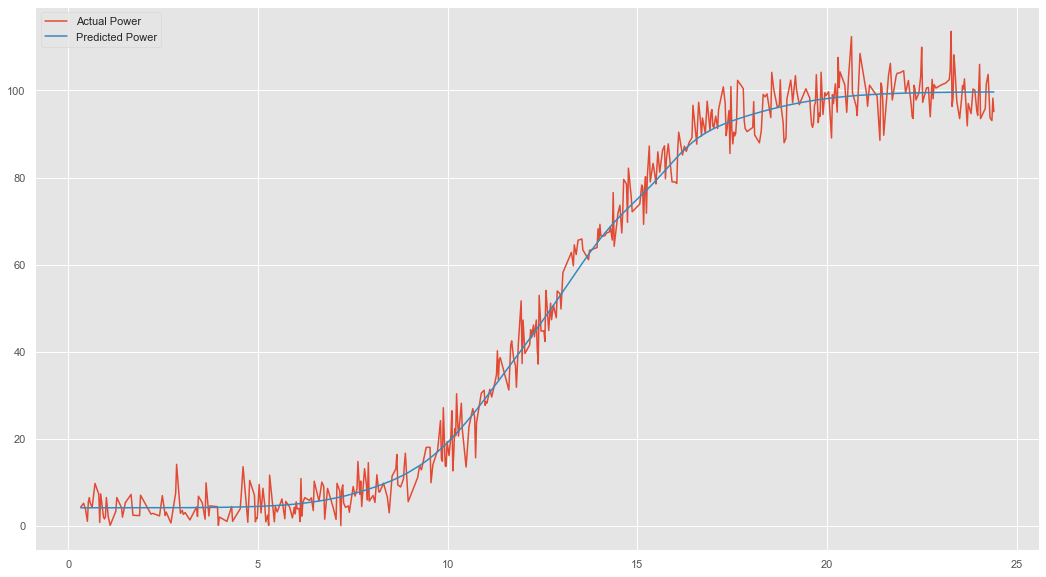

In [153]:
# Plot Data and Predictions to Visualise
plt.plot(x, y, label='Actual Power')
plt.plot(x, model.predict(x), label='Predicted Power')
plt.legend()

In [154]:
# Save the model
model.save("model.h5")
print("model saved")

model saved


#### References

1. https://www.esb.ie/tns/education-hub/future-energy/wind-energy

2. https://www.encyclopedia.com/earth-and-environment/ecology-and-environmentalism/environmental-studies/s-shaped-growth-curve#:~:text=S%2Dshaped%20growth%20curve(sigmoid,then%20declines%20in%20a%20negative